In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import io
%matplotlib inline

In [3]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath)

In [4]:
df["Screen_Size_cm"] = np.round(df["Screen_Size_cm"] , 2)

In [5]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [6]:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [7]:
avarage_Weight_kg = df["Weight_kg"].mean()
avarage_Weight_kg

1.8622317596566522

In [8]:
df["Weight_kg"] = df["Weight_kg"].fillna(avarage_Weight_kg)

In [9]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [10]:
df["Weight_kg"] = df["Weight_kg"]*2.205

In [11]:
df = df.rename(columns={"Weight_kg": "Weight_lb"})

In [12]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lb,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,4.21155,837


In [13]:
df["Screen_Size_cm"] = df["Screen_Size_cm"] / 2.54 

In [14]:
df = df.rename(columns = {"Screen_Size_cm" : "Screen_Size_inc"})

In [15]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inc,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lb,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837


In [16]:
df["CPU_frequency"] = df["CPU_frequency"] / df["CPU_frequency"].max()

In [17]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inc,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lb,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837


In [18]:
bins = np.linspace( df["Price"].min() , df["Price"].max() , 4 )  

In [19]:
group_names  = ["low" , "medium", "high"] 

In [20]:
df["Price_Binned"] = pd.cut(df["Price"] , bins , labels = group_names , include_lowest = True)

In [21]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inc,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lb,Price,Price_Binned
0,0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978,low
1,1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634,low
2,2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946,low
3,3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244,low
4,4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837,low


In [22]:
dummy_variable1 = pd.get_dummies(df["Screen"]) 
dummy_variable1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df , dummy_variable1] , axis = 1) 
df = df.drop("Screen" , axis = 1) 

In [23]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inc,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lb,Price,Price_Binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,low,True,False


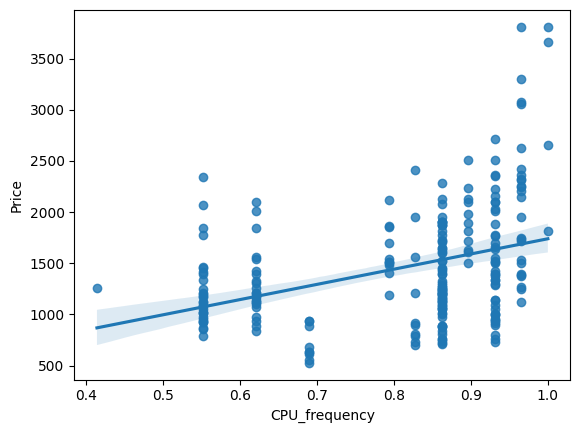

In [24]:
sns.regplot(x = "CPU_frequency" , y = "Price" , data = df)
plt.show()

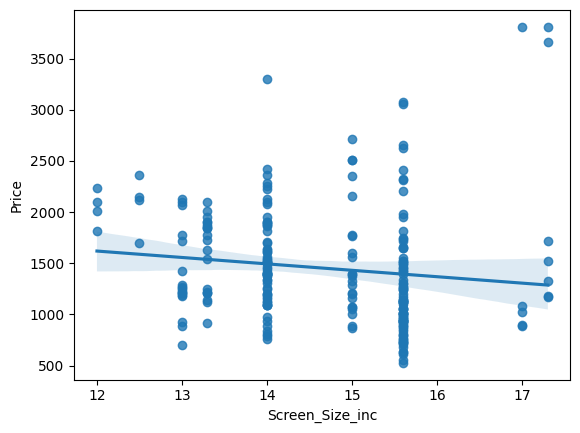

In [25]:
sns.regplot(x = "Screen_Size_inc" , y = "Price" , data = df)
plt.show()

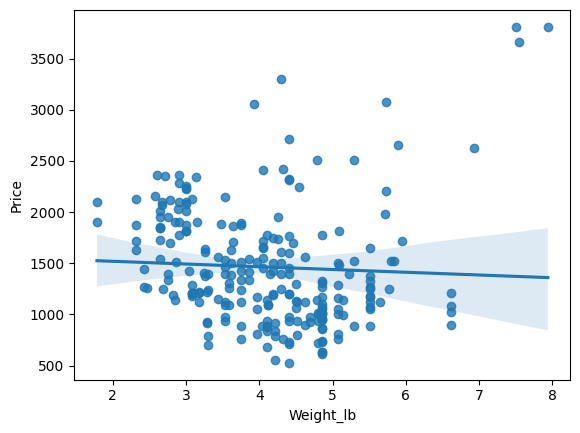

In [26]:
sns.regplot(x = "Weight_lb" , y = "Price" , data = df)
plt.show()

In [27]:
for param in ["CPU_frequency", "Screen_Size_inc","Weight_lb"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inc is                   Screen_Size_inc     Price
Screen_Size_inc         1.000000 -0.128143
Price                  -0.128143  1.000000
Correlation of Price and Weight_lb is             Weight_lb     Price
Weight_lb   1.000000 -0.050312
Price      -0.050312  1.000000


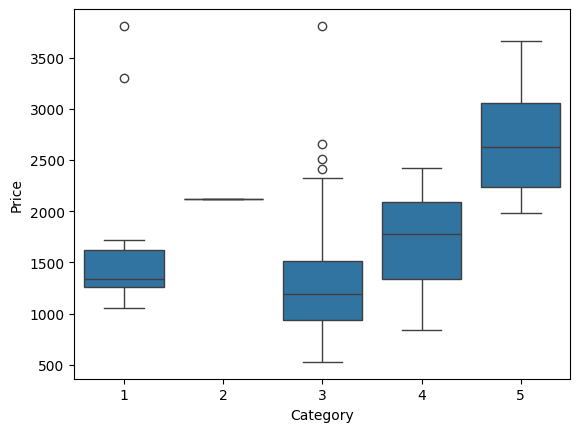

In [28]:
sns.boxplot(x = "Category" , y = "Price" , data = df) 
plt.show()

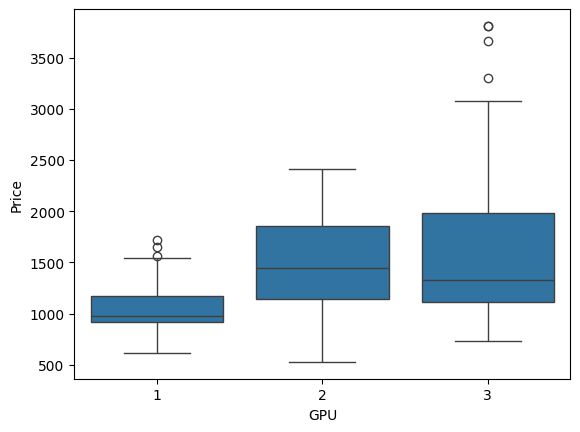

In [29]:
sns.boxplot(x = "GPU" , y = "Price" , data = df) 
plt.show()

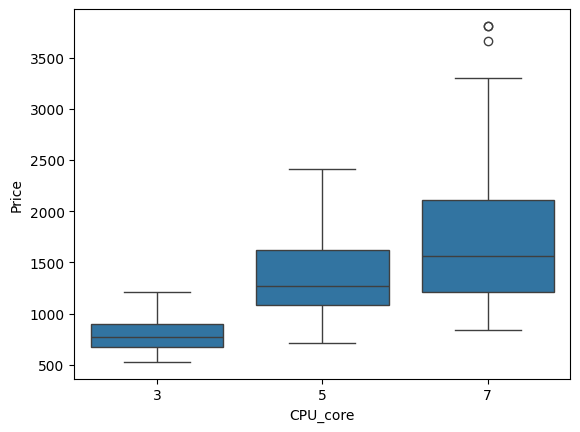

In [30]:
sns.boxplot(x = "CPU_core" , y = "Price" , data= df) 
plt.show()

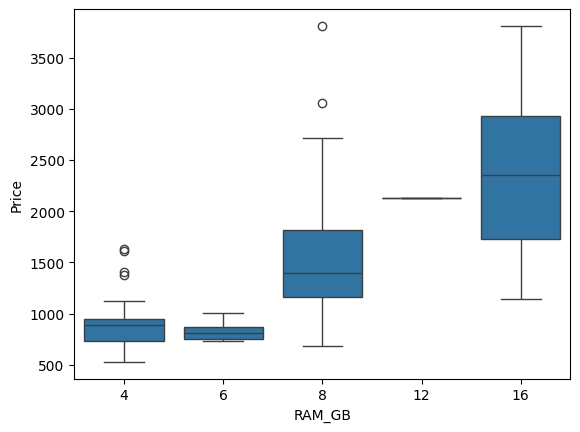

In [31]:
sns.boxplot(x = "RAM_GB" , y = "Price" , data = df)
plt.show()

In [32]:
df.describe(include = ["object"]) 

,Manufacturer
count,238
unique,11
top,Dell
freq,71


In [33]:
df_group = df[['GPU','CPU_core','Price']]
df_group = df_group.groupby(['GPU'] , as_index = False).mean()
print(df_group)

   GPU  CPU_core        Price
0    1  5.787879  1058.000000
1    2  5.352941  1474.308824
2    3  6.101449  1632.144928


In [34]:
grouped_pivot = df_group.pivot(index='GPU',columns='CPU_core')
grouped_pivot

Price                      
CPU_core     5.352941 5.787879     6.101449
GPU                                        
1                 NaN   1058.0          NaN
2         1474.308824      NaN          NaN
3                 NaN      NaN  1632.144928

### Model olayı

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [37]:
lm = LinearRegression()

In [38]:
X = df[["CPU_frequency"]]
Y = df["Price"]

In [39]:
lm.fit(X,Y)

LinearRegression()

In [40]:
y_pred = lm.predict(X)

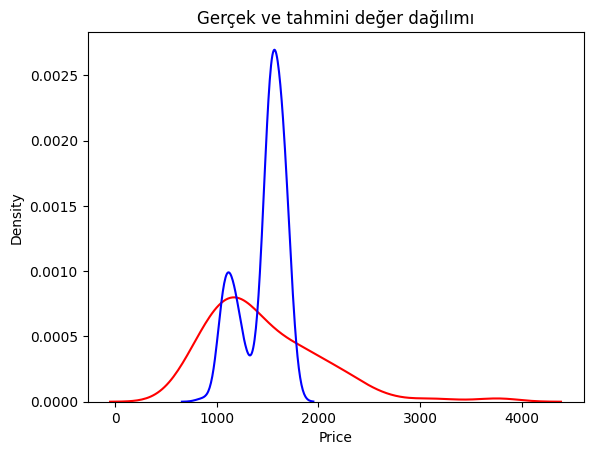

In [41]:
ax1 = sns.kdeplot(df["Price"] , color = "r" , label = "Actual Value")
sns.kdeplot(y_pred , color = "b" , label = "Fitted Values" , ax = ax1)
plt.title("Gerçek ve tahmini değer dağılımı")
plt.show()

In [42]:
mean_squared_error( Y , y_pred) 

284583.4405868629

In [43]:
lm.score(X , Y)

0.1344436321024326

### Multiple Regression

In [45]:
lm = LinearRegression()

In [46]:
Z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' ,'Category']]
T = df["Price"]

In [47]:
lm.fit(Z,T)

LinearRegression()

In [48]:
T_pred = lm.predict(Z)

In [49]:
mean_squared_error(T , T_pred)

161680.57263893107

In [50]:
lm.score(Z,T)

0.5082509055187374

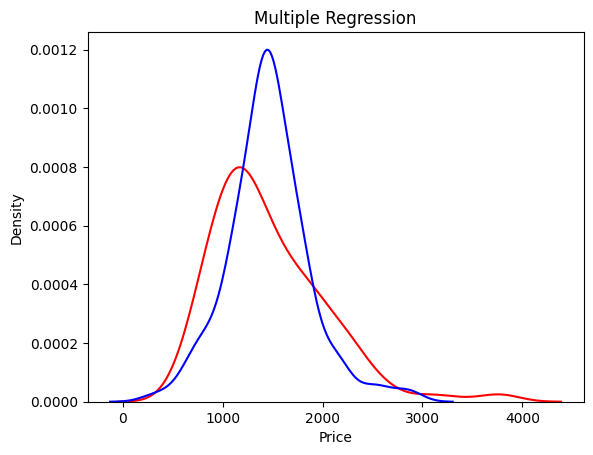

In [51]:
ax1 = sns.kdeplot(df["Price"] , color = "r" , label = "Actual Label")
sns.kdeplot(T_pred , color = "b" , label = "Second Label")
plt.title("Multiple Regression")
plt.show()

### Pipeline

In [53]:
Input = [("scale" , StandardScaler()),("polynomial" ,PolynomialFeatures(include_bias=False)),("model",LinearRegression())]

In [54]:
pipe = Pipeline(Input)

In [55]:
Z = Z.astype(float)
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [56]:
ypipe = pipe.predict(Z)

In [57]:
mean_squared_error(Y , ypipe)

223434.70798319328

In [58]:
pipe.score(Z , Y) 

0.3204266070247448

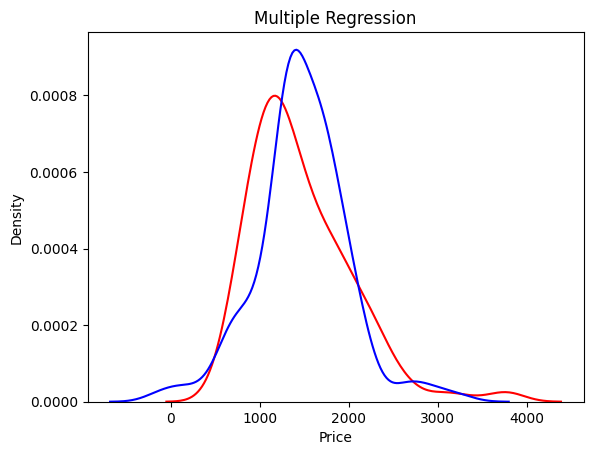

In [59]:
ax1 = sns.kdeplot(df["Price"] , color = "r" , label = "Actual Label")
sns.kdeplot(ypipe , color = "b" , label = "Second Label")
plt.title("Multiple Regression")
plt.show()

## Split Data